In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


# Mechanical Correlation

### Parts (a) & (b)

In [2]:
# any ipython work here
from scipy.linalg import circulant as circ

s1 = np.array([1,-1,1,-1,-1,-1,1,-1,1,1])
s2 = np.array([1,2,3,4,5,6,7,6,5,4])


S1 = circ(s1)
S2 = circ(s2)
print('Circulant matrix of signal s1:')
print(S1)
print('Circulant matrix of signal s2:')
print(S2)

auto_s1 = np.dot(s1,S1)
auto_s2 = np.dot(s2,S2)

corr_s1s2 = np.dot(s1,S2)
corr_s2s1 = np.dot(s2,S1)


print('Autocorrelation of s1, i.e. np.dot(s1,S1)')
print(auto_s1)
print('Autocorrelation of s2, i.e. np.dot(s2,S2)')
print(auto_s2)
print('Correlation of s1 with s2, i.e. np.dot(s1,S2)')
print(corr_s1s2)
print('Correlation of s2 with s1, i.e. np.dot(s2,S1)')
print(corr_s2s1)
print('Note that the correlation of s1 with s2 and s2 with s1 contain')
print('the same information except the shifts move in opposite directions.')
print('It is fine if you only computed correlation of s1 with s2 OR s2 with s1')


Circulant matrix of signal s1:
[[ 1  1  1 -1  1 -1 -1 -1  1 -1]
 [-1  1  1  1 -1  1 -1 -1 -1  1]
 [ 1 -1  1  1  1 -1  1 -1 -1 -1]
 [-1  1 -1  1  1  1 -1  1 -1 -1]
 [-1 -1  1 -1  1  1  1 -1  1 -1]
 [-1 -1 -1  1 -1  1  1  1 -1  1]
 [ 1 -1 -1 -1  1 -1  1  1  1 -1]
 [-1  1 -1 -1 -1  1 -1  1  1  1]
 [ 1 -1  1 -1 -1 -1  1 -1  1  1]
 [ 1  1 -1  1 -1 -1 -1  1 -1  1]]
Circulant matrix of signal s2:
[[1 4 5 6 7 6 5 4 3 2]
 [2 1 4 5 6 7 6 5 4 3]
 [3 2 1 4 5 6 7 6 5 4]
 [4 3 2 1 4 5 6 7 6 5]
 [5 4 3 2 1 4 5 6 7 6]
 [6 5 4 3 2 1 4 5 6 7]
 [7 6 5 4 3 2 1 4 5 6]
 [6 7 6 5 4 3 2 1 4 5]
 [5 6 7 6 5 4 3 2 1 4]
 [4 5 6 7 6 5 4 3 2 1]]
Autocorrelation of s1, i.e. np.dot(s1,S1)
[ 10  -2   2  -2   2 -10   2  -2   2  -2]
Autocorrelation of s2, i.e. np.dot(s2,S2)
[217 208 193 176 161 156 161 176 193 208]
Correlation of s1 with s2, i.e. np.dot(s1,S2)
[ -3   3   5  11   9   3  -3  -5 -11  -9]
Correlation of s2 with s1, i.e. np.dot(s2,S1)
[ -3  -9 -11  -5  -3   3   9  11   5   3]
Note that the correlation of s1 

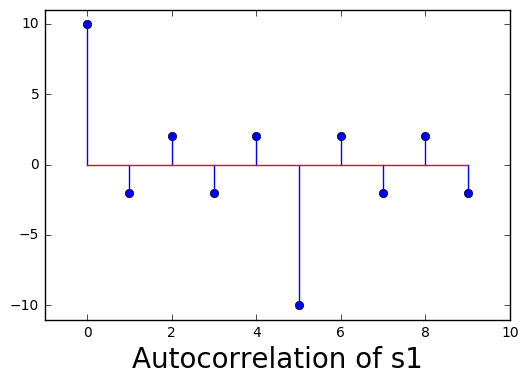

In [3]:
#vector of time shifts
tau = np.array(list(range(len(s1))))
plt.stem(tau,auto_s1); plt.xlim([-1,10]); plt.ylim((-11,11));
plt.xlabel('Autocorrelation of s1',fontsize=20)

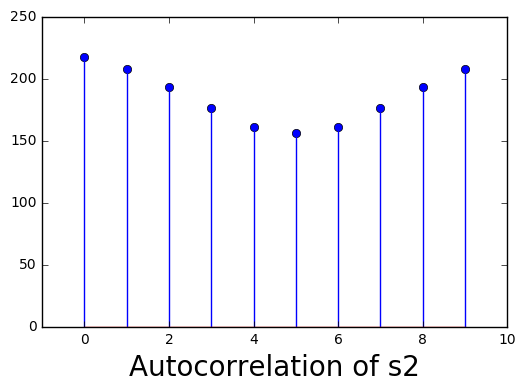

In [4]:
plt.stem(tau,auto_s2); plt.xlim([-1,10]); 
plt.xlabel('Autocorrelation of s2',fontsize=20)

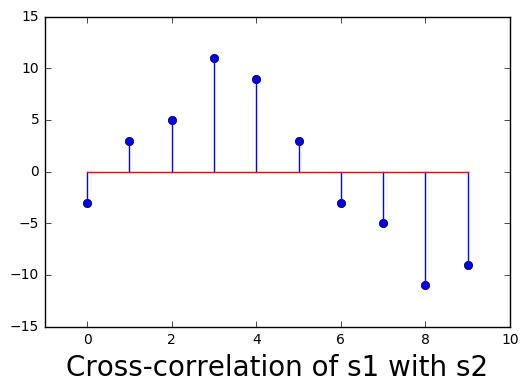

In [5]:
plt.stem(tau,corr_s1s2); plt.xlim([-1,10]); 
plt.xlabel('Cross-correlation of s1 with s2',fontsize=20)

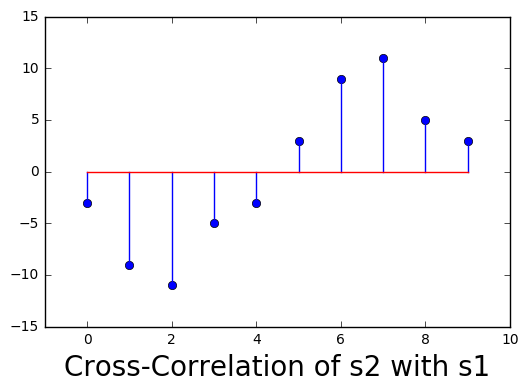

In [6]:
plt.stem(tau,corr_s2s1); plt.xlim([-1,10]); 
plt.xlabel('Cross-Correlation of s2 with s1',fontsize=20)

# Finding Signals in Noise

In [7]:
# Run this first
%matplotlib inline  
import numpy as np
import scipy as sp
import scipy.linalg as la
import pylab as plt
import numpy.random

N = 1000

def rand_vector(n): # returns a random {+1, -1} vector of length n
    return np.random.randint(2, size=n)*2 - 1.0

def rand_normed_vector(n): # returns a random normalized vector of length n
    x = rand_vector(n)
    return x / la.norm(x)

def cross_corr(f, g):
    # returns the cross-correlation (a vector of all the inner products of 'g' with shifted versions of 'f')
    C = la.circulant(f)
    corr = C.T.dot(g)
    return corr

## Part a

-0.032
-0.032
0.104


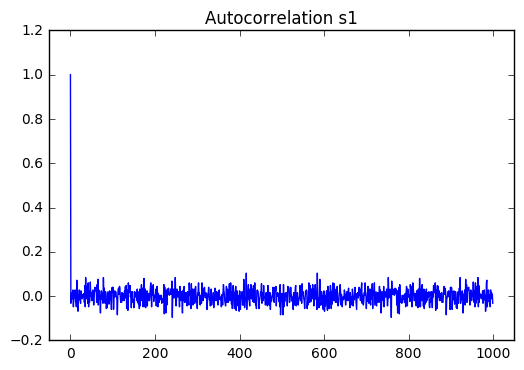

In [8]:
# generate a random normalized vector for s1
# (running this cell again will generate a new random vector)
s1 = rand_normed_vector(N)

# compute all the inner-products of s1 with shifted versions of s1
# (i.e., the cross-correlation of s1 with s1)
corr = cross_corr(s1, s1)

# The inner product <s1, s1^(1)> is:
print(corr[1])

# np.roll circularly shifts the signal
# so the above inner product could be computed as:
print(np.dot(s1, np.roll(s1,1)))

# Plot the autocorrelation:
plt.title("Autocorrelation s1")
plt.plot(corr)

x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])

# (optional code to plot max autocorrelation):
print(np.max(np.abs(corr[1:])))

plt.show()

## Part b

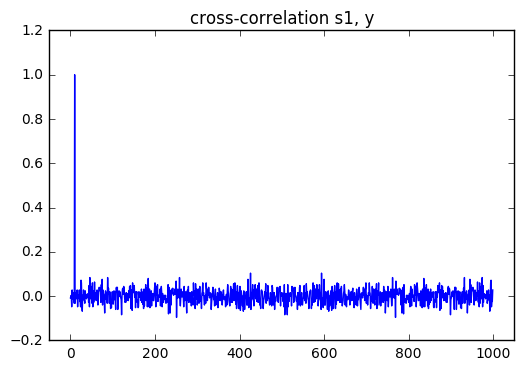

10


In [9]:
y = np.roll(s1, 10) # Received y = s1 shifted by 10

# Compute the cross-correlation (all the inner products of y with shifted versions of s1)
corr = cross_corr(s1, y)

# Plot
plt.title("cross-correlation s1, y")
plt.plot(corr)

x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

# Find the index of maximum correlation (inner product)
print(np.argmax(corr))

## Part c

In [10]:
# generate a random normalized vector for s1,
# and a random normalized vector for n
# (running this cell again will generate new random vectors)
s1 = rand_normed_vector(N)
n = rand_normed_vector(N)

print(np.abs(np.dot(s1, n)))

0.05


## Part d

This is the code from part (b), but with the received signal $\vec{y}$, which is corrupted by noise.

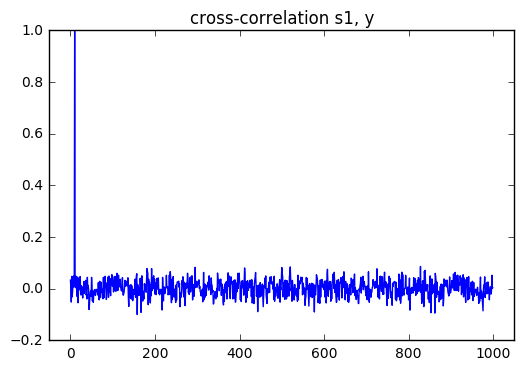

10

In [11]:
s1 = rand_normed_vector(N)
n = rand_normed_vector(N)
y = np.roll(s1, 10) + 0.1*n

corr = cross_corr(s1, y)

plt.title("cross-correlation s1, y")
plt.plot(corr)

x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

# Find the index of maximum correlation (inner product)
np.argmax(corr)

## Part e
Copy the code provided for part (d), but modify it appropriately, so that the noise is higher.
You should generate two cross-correlation plots, one for each noise level in the question.
(You can just copy the code from part (d) twice.)

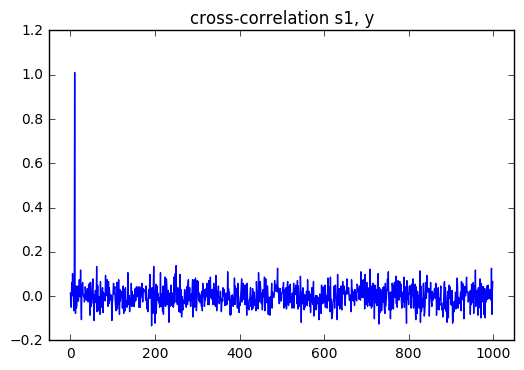

10


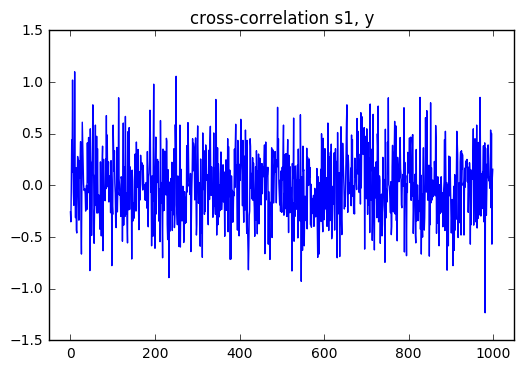

10


In [12]:
## PLOT 1
s1 = rand_normed_vector(N)
n = rand_normed_vector(N)
y = np.roll(s1, 10) + 1*n

corr = cross_corr(s1, y)

plt.title("cross-correlation s1, y")
plt.plot(corr)

x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

# Find the index of maximum correlation (inner product)
print(np.argmax(corr))


## PLOT 2
y = np.roll(s1, 10) + 10*n

corr = cross_corr(s1, y)

plt.title("cross-correlation s1, y")
plt.plot(corr)

x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

# Find the index of maximum correlation (inner product)
print(np.argmax(corr))

## Part f

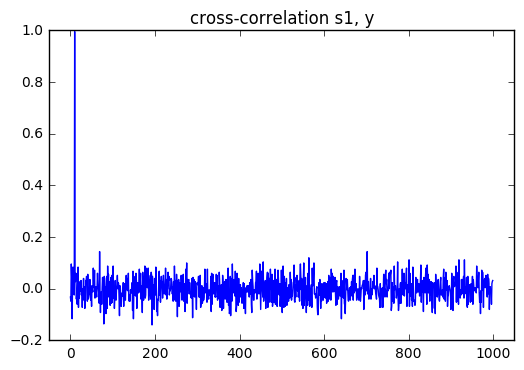

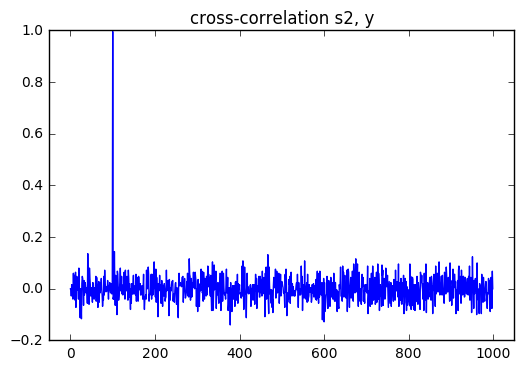

10 100


In [13]:
s1 = rand_normed_vector(N)
s2 = rand_normed_vector(N)

y = np.roll(s1, 10) + np.roll(s2, 100)

# Compute cross-correlations:
corr_s1_y = cross_corr(s1, y)
corr_s2_y = cross_corr(s2, y)

# Plot cross-correlations:
plt.title("cross-correlation s1, y")
plt.plot(cross_corr(s1, y))
x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

plt.title("cross-correlation s2, y")
plt.plot(cross_corr(s2, y))
x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

j = np.argmax(corr_s1_y) # find the first signal delay (max index of correlation)
k = np.argmax(corr_s2_y) # find the second signal delay
print(j,k)

## Part g

This is the same code as in part (f) but with a slight modification to how the received signal $\vec{y}$ is generated.
Run the below cell a few times to test for different choices of random signals.

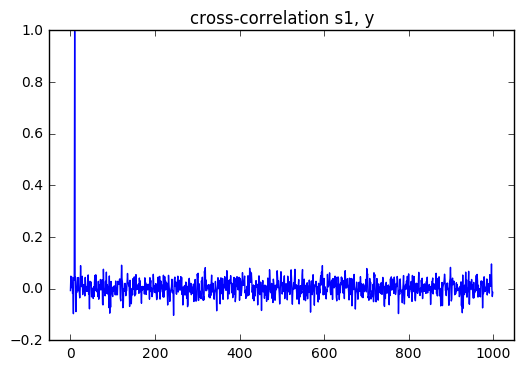

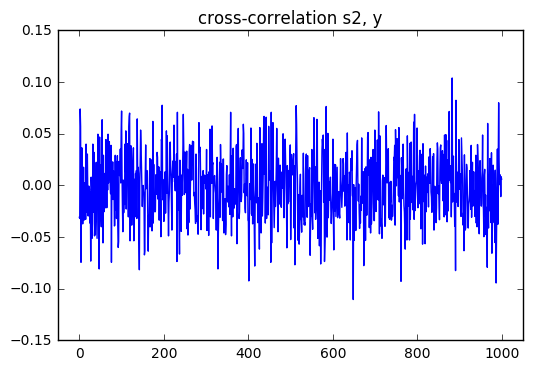

In [14]:
s1 = rand_normed_vector(N)
s2 = rand_normed_vector(N)

y = np.roll(s1, 10) + 0.1*np.roll(s2, 100)

# Compute cross-correlations:
corr_s1_y = cross_corr(s1, y)
corr_s2_y = cross_corr(s2, y)

# Plot cross-correlations:
plt.title("cross-correlation s1, y")
plt.plot(cross_corr(s1, y))
x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

plt.title("cross-correlation s2, y")
plt.plot(cross_corr(s2, y))
x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

## Part h

10


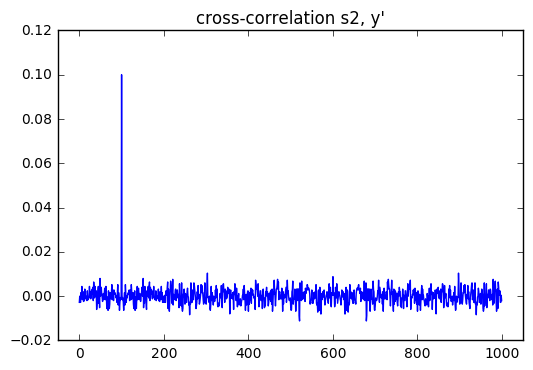

100


In [15]:
corr_s1_y = cross_corr(s1, y)
j = np.argmax(corr_s1_y) # find the first signal delay
print(j)

# subtract out the contribution of the first signal
y_prime = y - np.roll(s1, j)

# correlate the residual against the second signal
corr_s2_y = cross_corr(s2, y_prime)

# Plot 
plt.title("cross-correlation s2, y'")
plt.plot(corr_s2_y)
x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

k = np.argmax(corr_s2_y) # find the second signal delay by looking at the index of max correlation
print(k)

## Part i

In [16]:
s1 = rand_normed_vector(N)
s2 = rand_normed_vector(N)

y = 0.7*np.roll(s1, 10) + 0.5*np.roll(s2, 100)

corr_s1_y = cross_corr(s1, y)
j = np.argmax(corr_s1_y) # find the first signal delay

corr_s2_y = cross_corr(s2, y)
k = np.argmax(corr_s2_y) # find the second signal delay

print(j, k)

# Once we have found the shifts, estimate the coefficients as inner-products:
a1 = np.dot(y, np.roll(s1, j))
a2 = np.dot(y, np.roll(s2, k))

print(a1, a2)

10 100
0.706 0.5084


## Part j

This is the same code as part (i), but with noise added to the received signal $\vec{y}$.

In [17]:
s1 = rand_normed_vector(N)
s2 = rand_normed_vector(N)
n = rand_normed_vector(N)

y = 0.7*np.roll(s1, 10) + 0.5*np.roll(s2, 100) + 0.1*n

corr_s1_y = cross_corr(s1, y)
j = np.argmax(corr_s1_y) # find the first signal delay

corr_s2_y = cross_corr(s2, y)
k = np.argmax(corr_s2_y) # find the second signal delay

print(j, k)

# Once we have found the shifts, estimate the coefficients as inner products:
a1 = np.dot(y, np.roll(s1, j))
a2 = np.dot(y, np.roll(s2, k))

print(a1, a2)

10 100
0.6932 0.497
